IMPORTING INELUCTABLE LIBRARIES

In [1]:
import joblib
import pandas as pd
import seaborn as sb

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

IMPORTING DATASET

In [2]:
file = pd.read_csv("K:\PROJECT_SEASONAL_SALE_PREDICTION\SSV.csv")
file = file[["id", "week_id", "value"]]
file.head(20)

,id,week_id,value
0,frozen-yogurt,2004-01,20
1,frozen-yogurt,2004-02,16
2,frozen-yogurt,2004-03,7
3,frozen-yogurt,2004-04,7
4,frozen-yogurt,2004-05,13
5,frozen-yogurt,2004-06,9
6,frozen-yogurt,2004-07,8
7,frozen-yogurt,2004-08,10
8,frozen-yogurt,2004-09,14
9,frozen-yogurt,2004-10,19


PREPROCESSING

In [3]:
for i, item in enumerate(file["week_id"]):
    file.loc[i,["week_no"]]=int(item[5:])
    file.loc[i,["year"]]=int(item[:4])

for i, item in enumerate(file["id"]):
    file.loc[i, ["id"]] = item.replace("-"," ")

file.head(10)

,id,week_id,value,week_no,year
0,frozen yogurt,2004-01,20,1.0,2004.0
1,frozen yogurt,2004-02,16,2.0,2004.0
2,frozen yogurt,2004-03,7,3.0,2004.0
3,frozen yogurt,2004-04,7,4.0,2004.0
4,frozen yogurt,2004-05,13,5.0,2004.0
5,frozen yogurt,2004-06,9,6.0,2004.0
6,frozen yogurt,2004-07,8,7.0,2004.0
7,frozen yogurt,2004-08,10,8.0,2004.0
8,frozen yogurt,2004-09,14,9.0,2004.0
9,frozen yogurt,2004-10,19,10.0,2004.0


In [4]:
temp = {}
for i, item in enumerate(pd.unique(file["id"]), 1001):
    temp[item] = i

for i, item in enumerate(file["id"]):
    for a in temp:
        if a==item:
            file.loc[i,["p_id"]]=temp[a]

In [5]:
category = file.groupby(file.id).first()
category

,week_id,value,week_no,year,p_id
id,,,,,
anise,2004-01,26,1.0,2004.0,1145.0
apple,2004-01,17,1.0,2004.0,1113.0
apple au,2004-01,20,1.0,2004.0,1153.0
apple cider,2004-01,2,1.0,2004.0,1157.0
apple pie,2004-01,3,1.0,2004.0,1019.0
...,...,...,...,...,...
watermelon,2004-01,4,1.0,2004.0,1169.0
whiskey sour,2004-01,20,1.0,2004.0,1090.0
white russian,2004-01,21,1.0,2004.0,1089.0


DATA ANALYSATION

CORRELATION MATRIX

<AxesSubplot: >

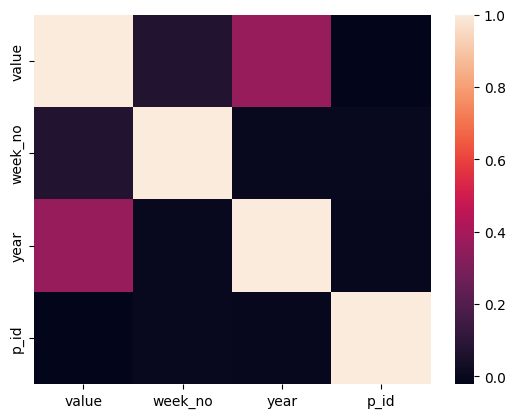

In [6]:
sb.heatmap(file.corr())

LINEPLOT BETWEEN "ID" AND "VALUE"

<AxesSubplot: xlabel='id', ylabel='value'>

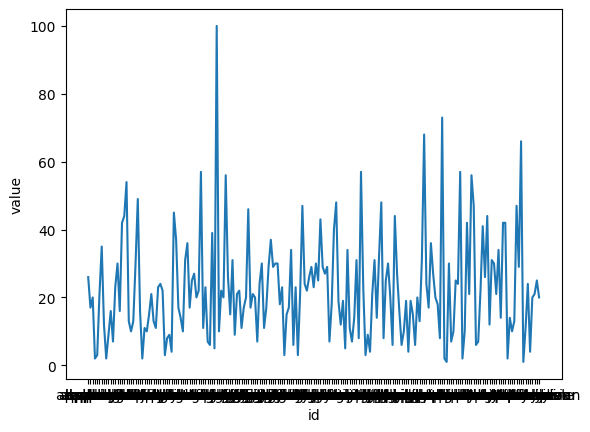

In [7]:
sb.lineplot(x="id", y="value", data=category)

PAIRPLOT FOR "ID"

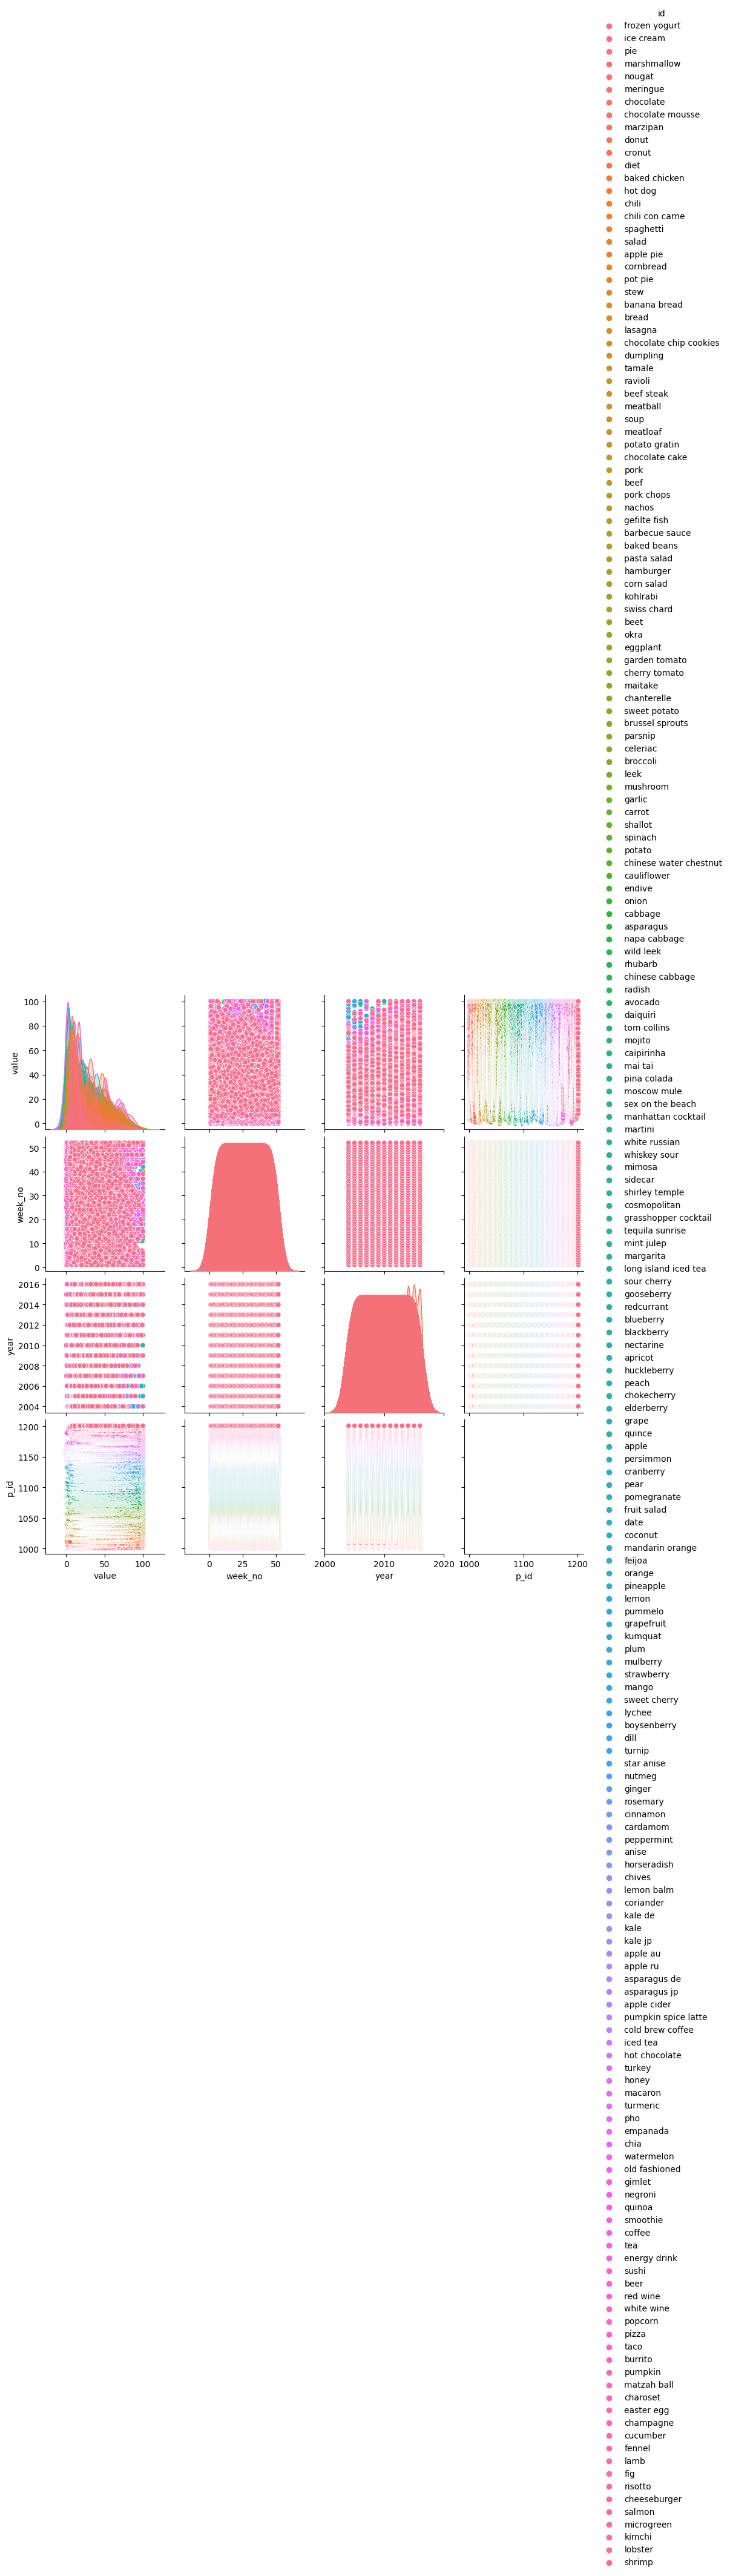

In [8]:
sb.pairplot(file, hue="id")

SPLIT DATASET INTO TRAINING AND TESTING DATASETS

In [9]:
x = file[["year", "week_no", "value"]]
y = file["id"]
train_x,test_x,train_y,test_y = train_test_split(x,y, test_size = 0.2)

IMPLEMENTING DIFFERENT MODELS

GAUSSIAN NAVE BAYES

In [10]:
GNB = GaussianNB()
GNB.fit(train_x,train_y)
print("Gaussian Naive Bayes score: ",GNB.score(test_x, test_y)*1000)

Gaussian Naive Bayes score:  17.219033512312535


DECISION TREE

In [11]:
DTC = tree.DecisionTreeClassifier(criterion='gini')
DTC.fit(train_x, train_y)
y_predict = DTC.predict(test_x)

print("Decission Tree Classifier score: ",accuracy_score(test_y, y_predict)*1000)

Decission Tree Classifier score:  9.479725976670986


KNN CLASSIFIER

In [12]:
KNC = KNeighborsClassifier()
KNC.fit(train_x, train_y)
y_pred_KNC = KNC.predict(test_x)
print("KNN Classifier score: ", accuracy_score(test_y, y_pred_KNC)*1000)

KNN Classifier score:  20.070357341233105


RANDOM FOREST CLASSIFIER

In [13]:
RFC= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
RFC.fit(train_x, train_y)
y_pred= RFC.predict(test_x)
print("Random Forest Classfier score: ", accuracy_score(test_y, y_pred)*1000)

Random Forest Classfier score:  6.109979633401222


ALL MODELS SCORE

In [14]:
print("Decission Tree Classifier score: ",accuracy_score(test_y, y_predict)*1000)
print("Random Forest Classfier score: ", accuracy_score(test_y, y_pred)*1000)
print("KNN Classifier score: ", accuracy_score(test_y, y_pred_KNC)*1000)
print("Gaussian Naive Bayes score: ",GNB.score(test_x, test_y)*1000)

Decission Tree Classifier score:  9.479725976670986
Random Forest Classfier score:  6.109979633401222
KNN Classifier score:  20.070357341233105
Gaussian Naive Bayes score:  17.219033512312535


In [15]:
joblib.dump(DTC, "Model.sav")

['Model.sav']

In [16]:
loaded_model = joblib.load("Model.sav")
print("Score = ",round((loaded_model.score(test_x, test_y)*10000), 2), "%")

Score =  94.8 %


In [17]:
loaded_model.predict([[2002, 24, 22]])

k:\PYTHON-3_8_8\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['star anise'], dtype=object)